In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('Basedata/Training/',
                                        target_size=(224,224),
                                        batch_size=5,
                                        class_mode='categorical')
validation_dataset=valid.flow_from_directory('Basedata/Validation/',
                                        target_size=(224,224),
                                        batch_size=5,
                                        class_mode='categorical')

Found 834 images belonging to 4 classes.
Found 21 images belonging to 4 classes.


In [4]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(64,activation='relu'),
                                 tf.keras.layers.Dense(4,activation='softmax')])

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(learning_rate=0.00001),
             metrics='accuracy')
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1,patience=5,min_delta=0.001)

In [6]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=100,
                    validation_data=validation_dataset)

Epoch 1/100
5/5 [==============================] - 4s 769ms/step - loss: 1.4026 - accuracy: 0.3200 - val_loss: 1.4092 - val_accuracy: 0.2857
Epoch 2/100
5/5 [==============================] - 3s 727ms/step - loss: 1.4104 - accuracy: 0.2800 - val_loss: 1.3744 - val_accuracy: 0.2857
Epoch 3/100
5/5 [==============================] - 3s 708ms/step - loss: 1.3027 - accuracy: 0.3200 - val_loss: 1.3970 - val_accuracy: 0.2857
Epoch 4/100
5/5 [==============================] - 3s 707ms/step - loss: 1.3417 - accuracy: 0.3600 - val_loss: 1.3739 - val_accuracy: 0.2857
Epoch 5/100
5/5 [==============================] - 3s 723ms/step - loss: 1.3718 - accuracy: 0.2800 - val_loss: 1.3478 - val_accuracy: 0.2857
Epoch 6/100
5/5 [==============================] - 3s 710ms/step - loss: 1.3546 - accuracy: 0.3600 - val_loss: 1.3739 - val_accuracy: 0.2381
Epoch 7/100
5/5 [==============================] - 4s 772ms/step - loss: 1.3192 - accuracy: 0.4000 - val_loss: 1.3473 - val_accuracy: 0.3333
Epoch 8/100
5

Epoch 59/100
5/5 [==============================] - 4s 929ms/step - loss: 0.9272 - accuracy: 0.7200 - val_loss: 1.1297 - val_accuracy: 0.4286
Epoch 60/100
5/5 [==============================] - 5s 1s/step - loss: 1.1213 - accuracy: 0.4800 - val_loss: 1.1177 - val_accuracy: 0.4762
Epoch 61/100
5/5 [==============================] - 5s 1s/step - loss: 1.0039 - accuracy: 0.5600 - val_loss: 1.0750 - val_accuracy: 0.4286
Epoch 62/100
5/5 [==============================] - 5s 943ms/step - loss: 0.9671 - accuracy: 0.6400 - val_loss: 1.0629 - val_accuracy: 0.4762
Epoch 63/100
5/5 [==============================] - 4s 857ms/step - loss: 1.0445 - accuracy: 0.6000 - val_loss: 1.0579 - val_accuracy: 0.5714
Epoch 64/100
5/5 [==============================] - 4s 881ms/step - loss: 1.0840 - accuracy: 0.5200 - val_loss: 1.0587 - val_accuracy: 0.4286
Epoch 65/100
5/5 [==============================] - 4s 851ms/step - loss: 0.9176 - accuracy: 0.6400 - val_loss: 1.1038 - val_accuracy: 0.4762
Epoch 66/100

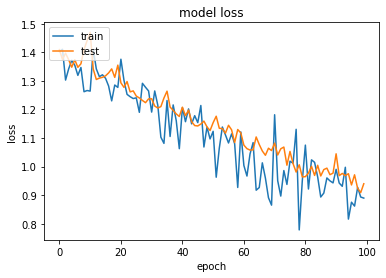

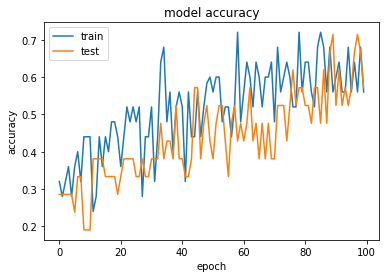

In [7]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

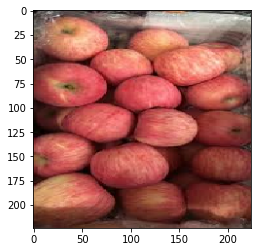

It's a Strawberry


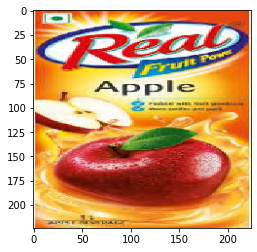

It's a Strawberry


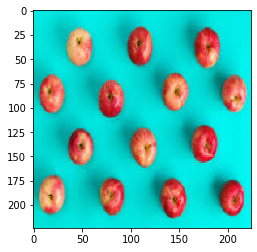

It's a Strawberry


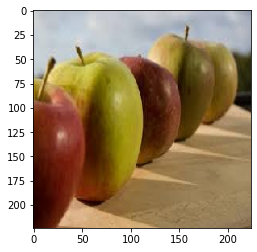

It's a Strawberry


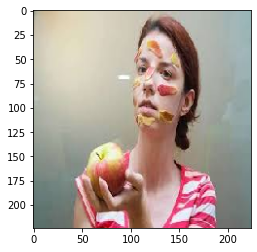

It's a Strawberry


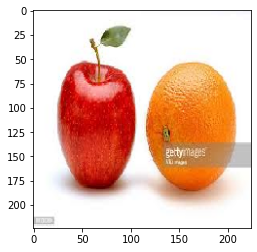

It's a Strawberry


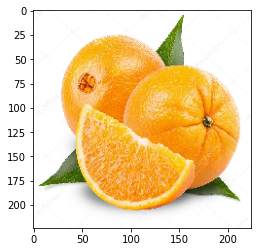

It's a Strawberry


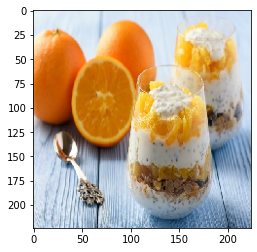

It's a Strawberry


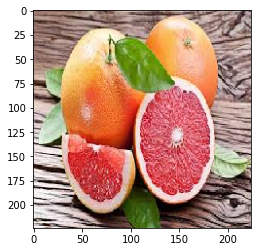

It's a Strawberry


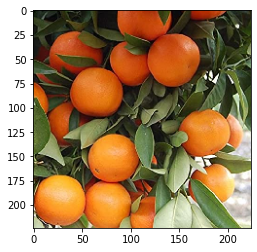

It's a Strawberry


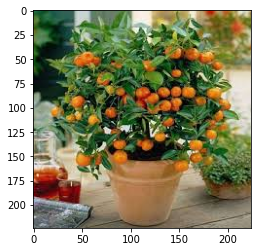

It's a Strawberry


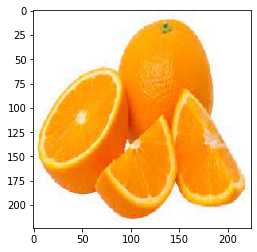

It's a Strawberry


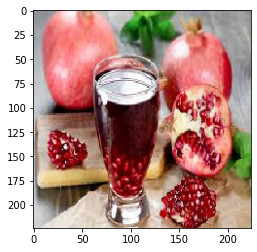

It's a Strawberry


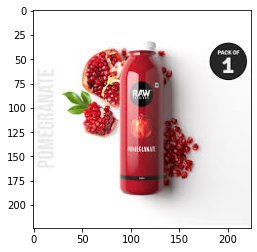

It's a Strawberry


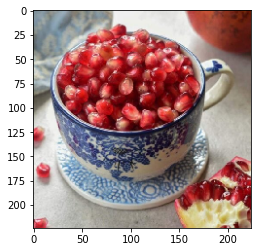

It's a Strawberry


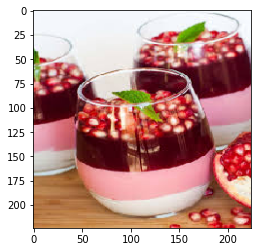

It's a Strawberry


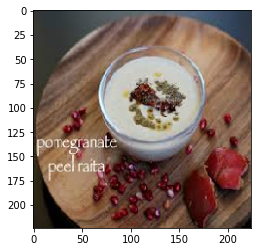

It's a Strawberry


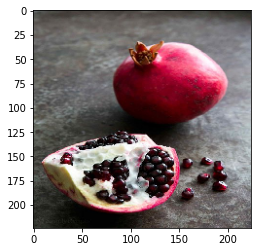

It's a Strawberry


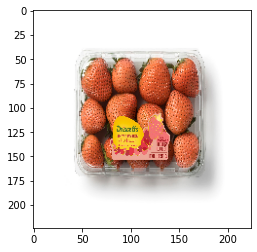

It's a Strawberry


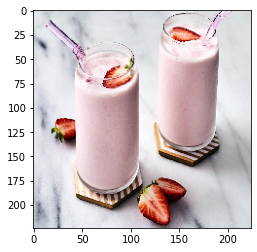

It's a Strawberry


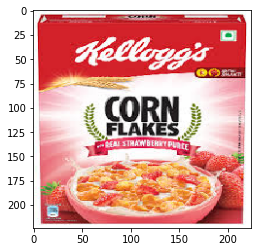

It's a Strawberry


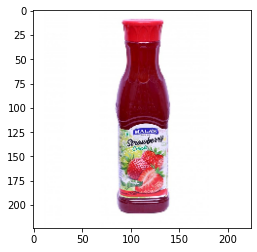

It's a Strawberry


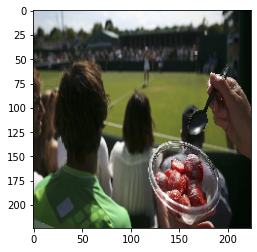

It's a Strawberry


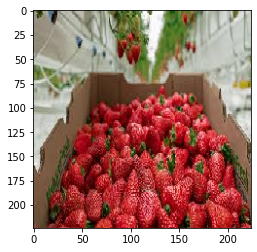

It's a Strawberry


In [8]:
c=['Apple','Orange','Pomegranate','Strawberry']
dir_path='Basedata/Testing'
for i in os.listdir(dir_path):
    for j in range(1,7):
        img=image.load_img(dir_path+'/'+i+'/'+'img'+str(j)+'.jpg',target_size=(224,224))
        plt.imshow(img)
        plt.show()
        
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        val=model.predict(images)
        if c[0][0]==1:
            print("It's an Apple")
        elif c[0][1]==1:
            print("It's an Orange")
        elif c[0][2]==1:
            print("It's a Pomegranate")
        else:
            print("It's a Strawberry")